In [38]:
# ------------------------------
# 📦 Data Handling Libraries
# ------------------------------

import pandas as pd       # Used for data manipulation, cleaning, and analysis
import numpy as np        # Provides numerical operations and array-based computations


# ------------------------------
# 🎨 Visualization Libraries
# ------------------------------

import matplotlib.pyplot as plt  # Core plotting library for static visualizations
import seaborn as sns            # Statistical visualizations built on top of Matplotlib


# ------------------------------
# 📊 Interactive Dashboard (Dash)
# ------------------------------

from dash import Dash, dcc, html, Input, Output  
# Dash: Main framework for building interactive dashboards
# dcc: Dash core components (e.g., graphs, dropdowns)
# html: HTML components for page layout
# Input/Output: Used to create dynamic callbacks for interactivity

import plotly.express as px      # Simplified interface for creating interactive Plotly charts


# ------------------------------
# 🎨 Additional Utilities
# ------------------------------

import matplotlib.colors as mcolors  # Provides color maps and tools for custom color handling


# ------------------------------
# ⚠️ Warning Control
# ------------------------------

import warnings
warnings.filterwarnings('ignore')    # Suppress irrelevant warnings for cleaner output


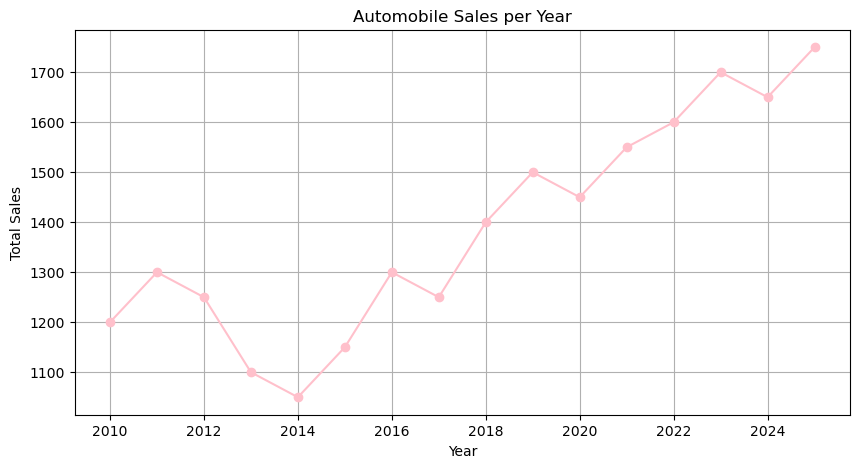

In [39]:
# ------------------------------
# 📊 Example Dataset Creation
# ------------------------------

data = {
    'Year': np.arange(2010, 2026),  
    # Generates an array of years from 2010 to 2025

    'Total_Sales': [
        1200, 1300, 1250, 1100, 1050, 1150, 1300, 1250,
        1400, 1500, 1450, 1550, 1600, 1700, 1650, 1750
    ]
    # Example yearly sales values corresponding to each year
}

df = pd.DataFrame(data)
# Converts the dictionary into a pandas DataFrame for easier analysis and visualization


# ------------------------------
# 📈 Line Chart (Matplotlib)
# ------------------------------

plt.figure(figsize=(10,5))
# Sets the size of the plot (width=10, height=5)

plt.plot(df['Year'], df['Total_Sales'], marker='o', color='Pink')
# Plots the sales trend over the years
# marker='o' adds a circle marker on each data point
# color='Pink' sets the line color

plt.title('Automobile Sales per Year')
# Adds a title to the chart

plt.xlabel('Year')
# Labels the x-axis

plt.ylabel('Total Sales')
# Labels the y-axis

plt.grid(True)
# Enables grid lines for better readability

plt.show()
# Displays the final plot


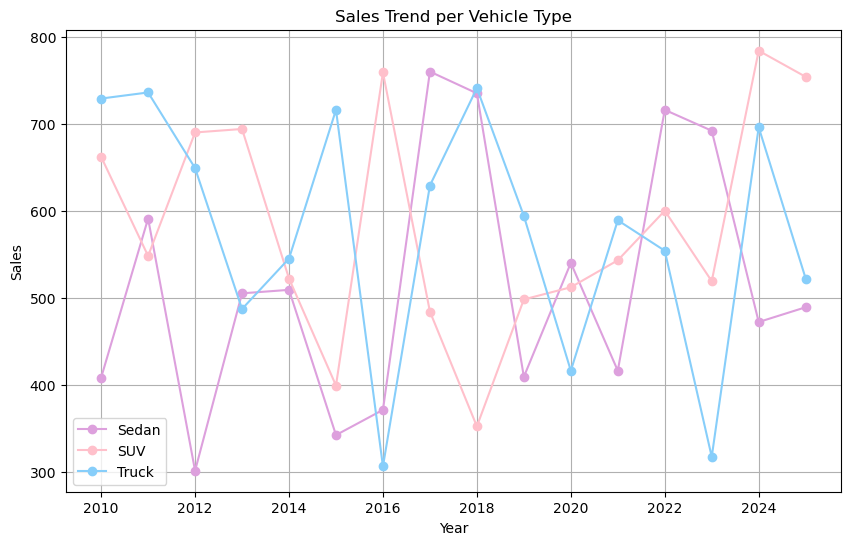

In [40]:
# -----------------------------------------
# 📊 Create Vehicle Sales Dataset
# -----------------------------------------

vehicle_data = pd.DataFrame({
    'Year': np.tile(np.arange(2010, 2026), 3),
    # Repeats the years 2010–2025 three times (one for each vehicle type)

    'Vehicle_Type': ['Sedan']*16 + ['SUV']*16 + ['Truck']*16,
    # Creates 16 entries for each vehicle type to match the number of years

    'Sales': np.random.randint(300, 800, 48)
    # Random sales values between 300 and 800 for each row
})


# -----------------------------------------
# 🎨 Assign Colors for Each Vehicle Type
# -----------------------------------------

colors = {
    'Sedan': 'plum',          # Color for Sedan line
    'SUV': 'pink',            # Color for SUV line
    'Truck': 'lightskyblue'   # Color for Truck line
}


# -----------------------------------------
# 📈 Plot Sales Trend per Vehicle Type
# -----------------------------------------

plt.figure(figsize=(10,6))
# Sets the figure size for better visibility

for v_type in vehicle_data['Vehicle_Type'].unique():
    subset = vehicle_data[vehicle_data['Vehicle_Type'] == v_type]
    # Filters the dataset for the current vehicle type

    plt.plot(
        subset['Year'], 
        subset['Sales'], 
        marker='o', 
        label=v_type, 
        color=colors[v_type]
    )
    # Plots the sales trend for each vehicle type separately


plt.title('Sales Trend per Vehicle Type')
# Adds a title to the chart

plt.xlabel('Year')
# Label for the x-axis

plt.ylabel('Sales')
# Label for the y-axis

plt.legend()
# Displays the legend to differentiate vehicle types

plt.grid(True)
# Adds grid lines for clarity

plt.show()
# Renders the final plot


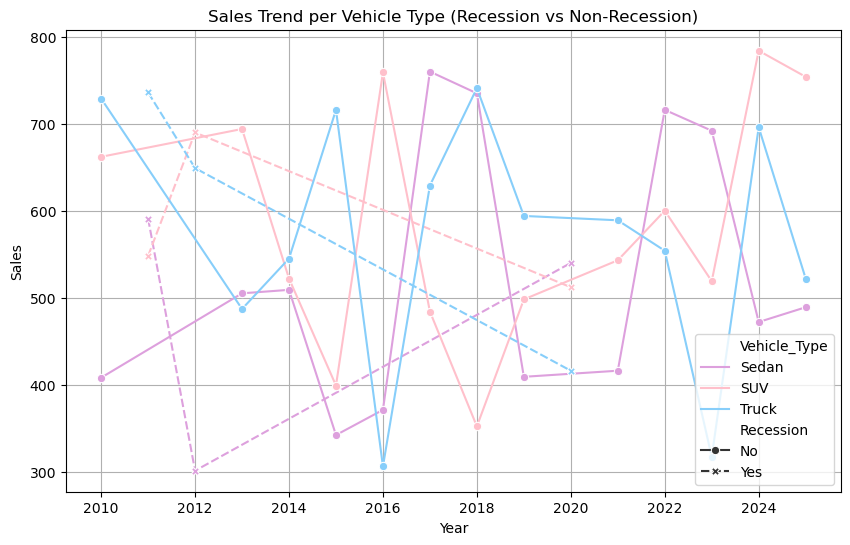

In [41]:
# -----------------------------------------
# 📌 Add Recession Information
# -----------------------------------------

vehicle_data['Recession'] = [
    'Yes' if y in [2011, 2012, 2020] else 'No'
    for y in vehicle_data['Year']
]
# Adds a new column indicating whether each year was a recession year
# Years 2011, 2012, and 2020 are labeled as recession years ("Yes")


# -----------------------------------------
# 🎨 Define Custom Colors for Vehicle Types
# -----------------------------------------

custom_palette = {
    'Sedan': 'plum',           # Color for Sedan
    'SUV': 'pink',             # Color for SUV
    'Truck': 'lightskyblue'    # Color for Truck
}


# -----------------------------------------
# 📈 Plot Sales with Recession Highlighting (Seaborn)
# -----------------------------------------

plt.figure(figsize=(10,6))
# Creates a figure with defined width and height

sns.lineplot(
    data=vehicle_data,      # Source dataframe
    x='Year',               # X-axis: years
    y='Sales',              # Y-axis: sales values
    hue='Vehicle_Type',     # Line color based on vehicle type
    style='Recession',      # Line style (solid/dashed) based on recession status
    markers=True,           # Adds markers to data points
    palette=custom_palette  # Applies custom color palette
)
# Draws a multi-line chart showing sales per vehicle type
# Recession years are visually distinguished by line style


plt.title('Sales Trend per Vehicle Type (Recession vs Non-Recession)')
# Adds a title to the visualization

plt.grid(True)
# Enables grid lines for better readability

plt.show()
# Displays the final plot


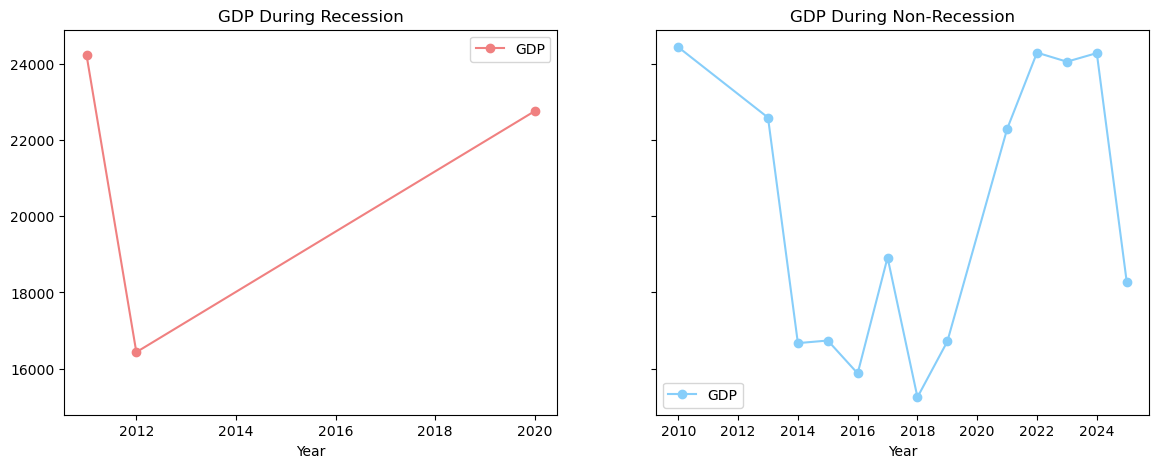

In [42]:
# -----------------------------------------
# 📊 Creating GDP Dataset
# -----------------------------------------

years = np.arange(2010, 2026)
# Generates an array of years from 2010 to 2025

GDP = np.random.randint(15000, 25000, 16)
# Generates random GDP values between 15,000 and 25,000 for each year

Recession = ['Yes' if y in [2011, 2012, 2020] else 'No' for y in years]
# Marks specific years as recession years (2011, 2012, 2020)

gdp_data = pd.DataFrame({'Year': years, 'GDP': GDP, 'Recession': Recession})
# Combines the arrays into a DataFrame for analysis and plotting


# -----------------------------------------
# 📈 Plotting Side-by-Side GDP Comparisons
# -----------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)
# Creates a 1x2 grid of subplots
# sharey=True ensures both plots use the same y-axis scale for easy comparison


# -----------------------------------------
# 📉 GDP During Recession Years
# -----------------------------------------

gdp_data[gdp_data['Recession'] == 'Yes'].plot(
    x='Year', 
    y='GDP',
    ax=axes[0],               # Plots on the left subplot
    marker='o',
    color='lightcoral',
    title='GDP During Recession'
)
# Plots GDP values specifically for recession years in red tones


# -----------------------------------------
# 📈 GDP During Non-Recession Years
# -----------------------------------------

gdp_data[gdp_data['Recession'] == 'No'].plot(
    x='Year',
    y='GDP',
    ax=axes[1],               # Plots on the right subplot
    marker='o',
    color='lightskyblue',
    title='GDP During Non-Recession'
)
# Plots GDP values for non-recession years in blue tones


# -----------------------------------------
# 📤 Display the Final Comparison
# -----------------------------------------

plt.show()
# Renders the figure containing both subplots


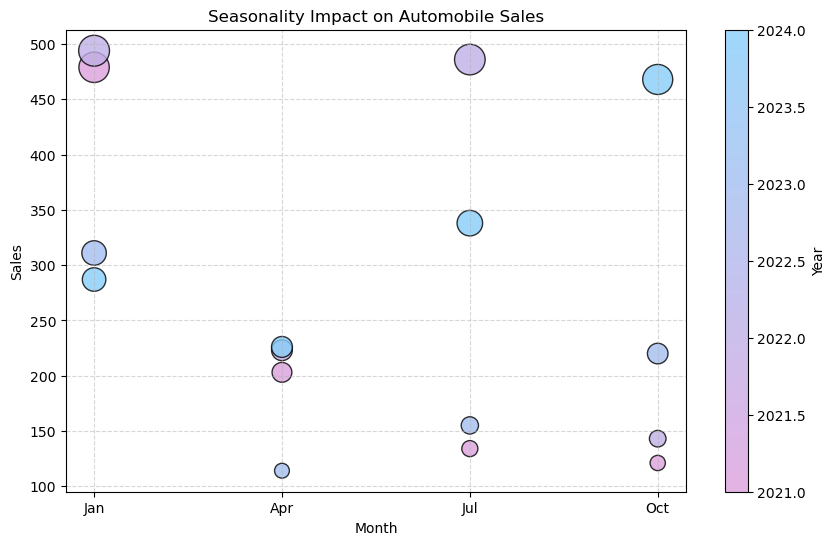

In [22]:
# -----------------------------------------
# 📊 Create Seasonal Sales Dataset
# -----------------------------------------

season_data = pd.DataFrame({
    'Month': np.tile(['Jan','Apr','Jul','Oct'], 4),
    # Repeats the four seasonal months for each year

    'Sales': np.random.randint(100, 500, 16),
    # Random sales values between 100 and 500

    'Year': np.repeat([2021, 2022, 2023, 2024], 4)
    # Assigns each group of months to a specific year
})


# -----------------------------------------
# 🎨 Prepare Figure for Scatter Plot
# -----------------------------------------

plt.figure(figsize=(10,6))
# Sets the figure size


# -----------------------------------------
# 🌈 Create Custom Color Gradient (Purple → Sky Blue)
# -----------------------------------------

cmap = mcolors.LinearSegmentedColormap.from_list(
    'purple_to_skyblue',
    ['plum', 'lightskyblue']
)
# Creates a custom colormap transitioning from purple to light sky blue


# -----------------------------------------
# 🔵 Scatter Plot (Seasonality Visualization)
# -----------------------------------------

scatter = plt.scatter(
    season_data['Month'],       # X-axis: seasonal months
    season_data['Sales'],       # Y-axis: sales values
    s=season_data['Sales'],     # Point size scaled to reflect sales volume
    c=season_data['Year'],      # Point color determined by year
    cmap=cmap,                  # Custom gradient color map
    alpha=0.8,                  # Slight transparency for visual clarity
    edgecolor='k'               # Black edge for better point definition
)


# -----------------------------------------
# 🏷️ Labels, Title, Grid, and Colorbar
# -----------------------------------------

plt.title('Seasonality Impact on Automobile Sales')
# Adds a descriptive plot title

plt.xlabel('Month')
# X-axis label

plt.ylabel('Sales')
# Y-axis label

plt.colorbar(scatter, label='Year')
# Shows color scale representing different years

plt.grid(True, linestyle='--', alpha=0.5)
# Adds a dashed grid with light transparency

plt.show()
# Displays the final scatter plot


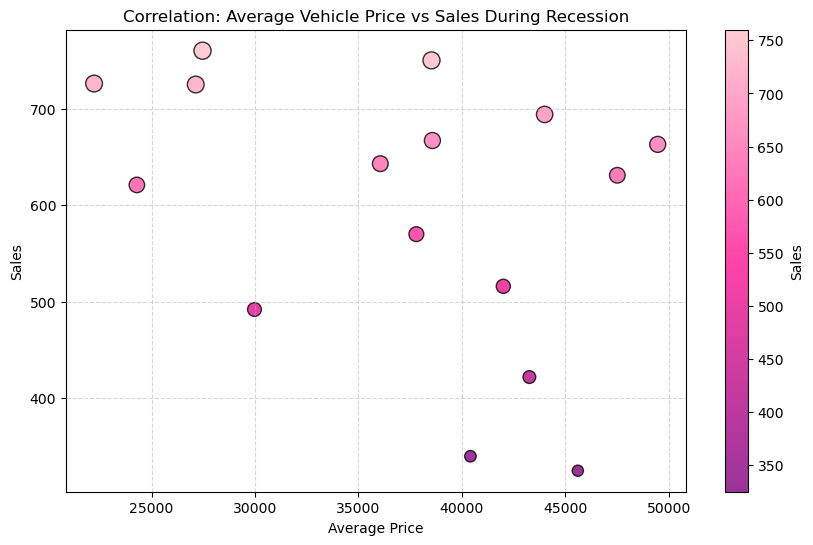

In [25]:
# -----------------------------------------
# 📊 Create Price vs Sales Dataset (Recession Only)
# -----------------------------------------

price_data = pd.DataFrame({
    'Avg_Price': np.random.randint(20000, 50000, 16),
    # Random average vehicle prices between 20,000 and 50,000

    'Sales': np.random.randint(300, 800, 16),
    # Random sales values between 300 and 800

    'Recession': ['Yes'] * 16
    # Every row is marked as a recession period
})


# -----------------------------------------
# 🎨 Prepare Figure for Scatter Plot
# -----------------------------------------

plt.figure(figsize=(10,6))
# Sets the plot size


# -----------------------------------------
# 🌈 Custom Colormap (Purple → Deep Pink → Light Pink)
# -----------------------------------------

cmap = mcolors.LinearSegmentedColormap.from_list(
    'purple_to_darkpink_to_lightpink',
    ['purple', 'deeppink', 'pink']
)
# Creates a smooth gradient from purple → dark pink → light pink


# -----------------------------------------
# 🔵 Scatter Plot (Price vs Sales Relationship)
# -----------------------------------------

scatter = plt.scatter(
    price_data['Avg_Price'],     # X-axis: average price
    price_data['Sales'],         # Y-axis: sales value
    c=price_data['Sales'],       # Color intensity depends on sales
    cmap=cmap,                   # Using the custom color gradient
    s=price_data['Sales'] / 5,   # Point size scaled by sales volume
    alpha=0.8,                   # Slight transparency for clarity
    edgecolor='k'                # Black edge around points for definition
)


# -----------------------------------------
# 🏷️ Labels, Title, Grid & Colorbar
# -----------------------------------------

plt.title('Correlation: Average Vehicle Price vs Sales During Recession')
# Adds descriptive title

plt.xlabel('Average Price')
# X-axis label

plt.ylabel('Sales')
# Y-axis label

plt.colorbar(scatter, label='Sales')
# Adds a color legend to indicate sales intensity

plt.grid(True, linestyle='--', alpha=0.5)
# Light dashed grid for better readability

plt.show()
# Displays the final scatter plot


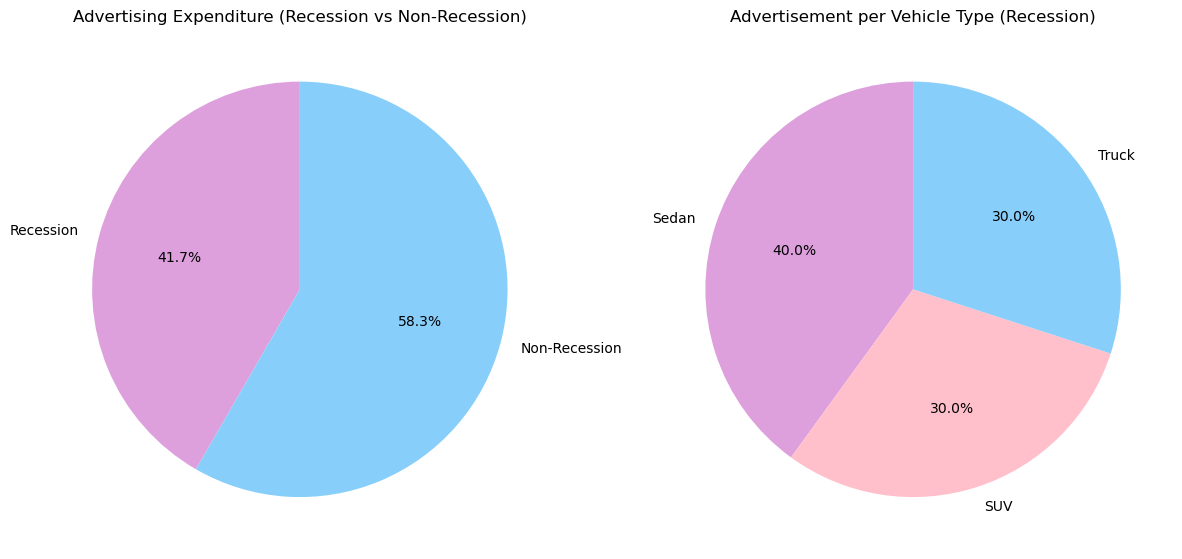

In [28]:
# -----------------------------------------
# 📊 Advertising Expenditure Data
# -----------------------------------------

adv_data = pd.DataFrame({
    'Period': ['Recession', 'Non-Recession'],
    # Two categories: Recession vs Non-Recession

    'Expenditure': [500, 700]
    # Total advertising spending for each period
})

adv_vehicle = pd.DataFrame({
    'Vehicle_Type': ['Sedan', 'SUV', 'Truck'],
    # Vehicle categories

    'Expenditure': [200, 150, 150]
    # Advertising expenditure per vehicle type during recession
})


# -----------------------------------------
# 🖼️ Create Figure with Two Side-by-Side Pie Charts
# -----------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(12,6))
# Creates a 1×2 grid of plots with a shared figure size


# -----------------------------------------
# 🥧 Pie Chart 1 — Recession vs Non-Recession Advertising
# -----------------------------------------

axes[0].pie(
    adv_data['Expenditure'],      # Values for the pie slices
    labels=adv_data['Period'],    # Labels for each slice
    autopct='%1.1f%%',            # Percentage formatting
    startangle=90,                # Starts the pie at 90 degrees for better symmetry
    colors=['plum', 'lightskyblue']
    # Custom colors for recession and non-recession
)

axes[0].set_title('Advertising Expenditure (Recession vs Non-Recession)')
# Title for the first pie chart


# -----------------------------------------
# 🥧 Pie Chart 2 — Ad Spending per Vehicle Type (Recession Only)
# -----------------------------------------

axes[1].pie(
    adv_vehicle['Expenditure'],       # Values for each vehicle type
    labels=adv_vehicle['Vehicle_Type'],  
    autopct='%1.1f%%',
    startangle=90,
    colors=['plum', 'pink', 'lightskyblue']
    # Custom colors for Sedan, SUV, and Truck
)

axes[1].set_title('Advertisement per Vehicle Type (Recession)')
# Title for the second pie chart


# -----------------------------------------
# 📐 Layout Adjustment + Display
# -----------------------------------------

plt.tight_layout()
# Adjusts spacing between subplots for clean layout

plt.show()
# Displays the two pie charts


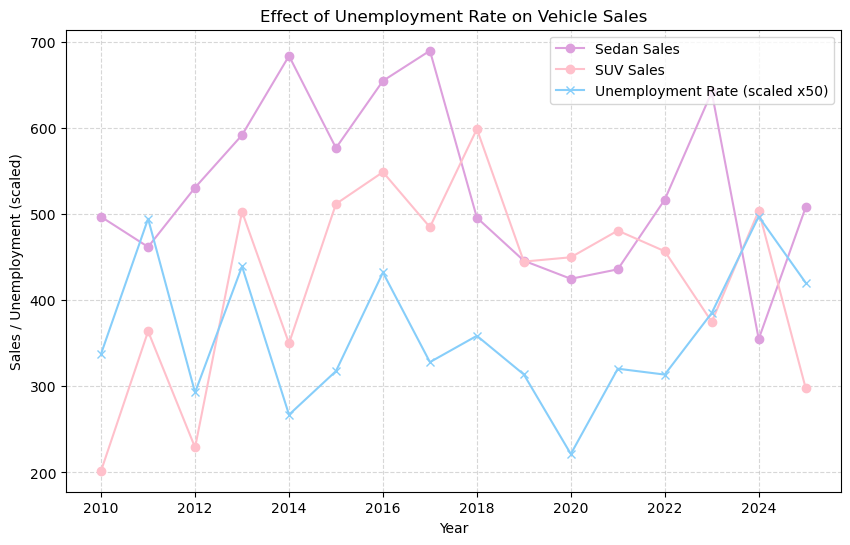

In [29]:
# -----------------------------------------
# 📊 Create Dataset: Sales + Unemployment Rate
# -----------------------------------------

unemp_data = pd.DataFrame({
    'Year': np.arange(2010, 2026),
    # Years from 2010 to 2025

    'Sedan_Sales': np.random.randint(300, 700, 16),
    # Random sales numbers for Sedan vehicles

    'SUV_Sales': np.random.randint(200, 600, 16),
    # Random sales numbers for SUV vehicles

    'Unemployment_Rate': np.random.uniform(4, 10, 16)
    # Random unemployment rate values between 4% and 10%
})


# -----------------------------------------
# 📈 Plot Sales and Unemployment Trends
# -----------------------------------------

plt.figure(figsize=(10,6))
# Sets the size of the figure for clearer visualization


# -----------------------------------------
# 🚗 Vehicle Sales Lines
# -----------------------------------------

plt.plot(
    unemp_data['Year'], 
    unemp_data['Sedan_Sales'], 
    marker='o', 
    color='plum', 
    label='Sedan Sales'
)
# Plots yearly sedan sales using purple markers

plt.plot(
    unemp_data['Year'], 
    unemp_data['SUV_Sales'], 
    marker='o', 
    color='pink', 
    label='SUV Sales'
)
# Plots yearly SUV sales using pink markers


# -----------------------------------------
# 📉 Unemployment Rate Line (Scaled ×50)
# -----------------------------------------

plt.plot(
    unemp_data['Year'], 
    unemp_data['Unemployment_Rate'] * 50, 
    marker='x', 
    color='lightskyblue', 
    label='Unemployment Rate (scaled x50)'
)
# Unemployment rate is multiplied by 50 to align visually with sales values
# Uses blue 'x' markers and a separate style for clear distinction


# -----------------------------------------
# 🏷️ Titles, Labels, Legend, Grid
# -----------------------------------------

plt.title('Effect of Unemployment Rate on Vehicle Sales')
# Title describing the overall chart

plt.xlabel('Year')
# X-axis label

plt.ylabel('Sales / Unemployment (scaled)')
# Y-axis label indicating dual meaning

plt.legend()
# Displays legend for all lines

plt.grid(True, linestyle='--', alpha=0.5)
# Adds a light dashed grid for readability

plt.show()
# Renders the final multi-line plot


In [37]:
# -----------------------------------------
# 📊 Create Vehicle Sales Dataset with Recession Info
# -----------------------------------------

vehicle_data = pd.DataFrame({
    'Year': np.tile(np.arange(2010, 2026), 3),
    # Repeat years 2010–2025 for each vehicle type

    'Vehicle_Type': ['Sedan']*16 + ['SUV']*16 + ['Truck']*16,
    # Assign vehicle types to match the repeated years

    'Sales': np.random.randint(300, 800, 48),
    # Random sales values for each vehicle-year combination

    'Recession': ['Yes' if y in [2011, 2012, 2020] else 'No' 
                  for y in np.tile(np.arange(2010, 2026), 3)]
    # Mark recession years as 'Yes', others as 'No'
})


# -----------------------------------------
# 🎨 Fixed Color Map for Vehicle Types
# -----------------------------------------

color_map = {
    'Sedan': 'plum', 
    'SUV': 'pink', 
    'Truck': 'lightskyblue'
}
# Assigns a fixed color to each vehicle type for consistent visualization


# -----------------------------------------
# 🖥️ Initialize Dash App
# -----------------------------------------

app = Dash(__name__)
app.title = "Automobile Sales Dashboard"
# Set browser tab title


# -----------------------------------------
# 🏗️ Layout of the Dashboard
# -----------------------------------------

app.layout = html.Div([
    html.H1("Automobile Sales Dashboard", style={'textAlign':'center'}),
    # Main title centered

    html.Label("Select Vehicle Type:"),
    # Label for dropdown selection

    dcc.Dropdown(
        id='vehicle-dropdown',
        options=[{'label': v, 'value': v} for v in vehicle_data['Vehicle_Type'].unique()],
        # Dropdown options: one per unique vehicle type
        value='Sedan'
        # Default selected value
    ),

    dcc.Graph(id='sales-graph')
    # Placeholder for the line chart
])


# -----------------------------------------
# 🔄 Callback to Update Graph Based on Dropdown
# -----------------------------------------

@app.callback(
    Output('sales-graph', 'figure'),
    Input('vehicle-dropdown', 'value')
)
def update_graph(selected_vehicle):
    filtered = vehicle_data[vehicle_data['Vehicle_Type'] == selected_vehicle]
    # Filter data for the selected vehicle type

    fig = px.line(
        filtered, x='Year', y='Sales',
        title=f'{selected_vehicle} Sales Over Years',
        markers=True,  # Show data points
        color_discrete_sequence=[color_map[selected_vehicle]]
        # Use fixed color from color map
    )
    return fig
    # Return the figure to update the Graph component


# -----------------------------------------
# 🚀 Run the Dash App
# -----------------------------------------

if __name__ == '__main__':
    app.run(debug=True)
    # Launches the dashboard locally with debug mode enabled
